# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Yousef Amr ElShazly

ID:52-7926

Tutorial: 3

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/telecom_churn.csv')

df.head()

<ipython-input-2-42697d995335>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [3]:
df.info() # looking at data types , and checking null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [4]:
print(df.MultipleLines.unique()) #initially checking some unique values of columns to understand what they are


['No phone service' 'No' 'Yes']


In [5]:
print(df.InternetService.unique())

['DSL' 'Fiber optic' 'No']


In [6]:
print(df.Contract.unique())

['Month-to-month' 'One year' 'Two year']


In [7]:
print(df.PaymentMethod.unique())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [8]:
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

## Data Cleaning

In [9]:
df= df.drop('customerID', axis=1) #dropping cust id because it is useless

In [10]:
df['TotalCharges'] = df['TotalCharges'].interpolate().astype(str)      #changing the numerical types to floats and not object
df['TotalCharges'] = df['TotalCharges'].str.extract('([0-9\s]+)', expand=False).str.strip()
df['TotalCharges'] = df['TotalCharges'].interpolate().astype(float)


df['MonthlyCharges'] = df['MonthlyCharges'].interpolate().astype(str)
df['MonthlyCharges'] = df['MonthlyCharges'].str.extract('([0-9\s]+)', expand=False).str.strip()
df['MonthlyCharges'] = df['MonthlyCharges'].interpolate().astype(float)

In [11]:
#here we are finding out the missing values in the total charges column by multiplying the tenure with the monthly charges
# Create a boolean nullvalues  to identify rows with missing values in 'TotalCharges' to be able to fill them with the calculated value
nullvalues = df['TotalCharges'].isnull()

# Calculate and fill missing values only where 'total_payment' is null using the nullvalues that we made
df.loc[nullvalues, 'TotalCharges'] = df.loc[nullvalues, 'tenure'] * df.loc[nullvalues, 'MonthlyCharges']

In [12]:
df.isnull().sum() #checking null values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.info() #checking attribute types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [14]:
categorical_col = [] #here we are visualizing the data to see all the unique values of the categorical columns
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [15]:
df['Churn'] = df['Churn'].astype('category').cat.codes #here we are encoding churn as label encoding
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int8

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

In [16]:
categorical_features = categorical_col.copy() #removing churn as it is the dependent variable
categorical_features.remove('Churn')

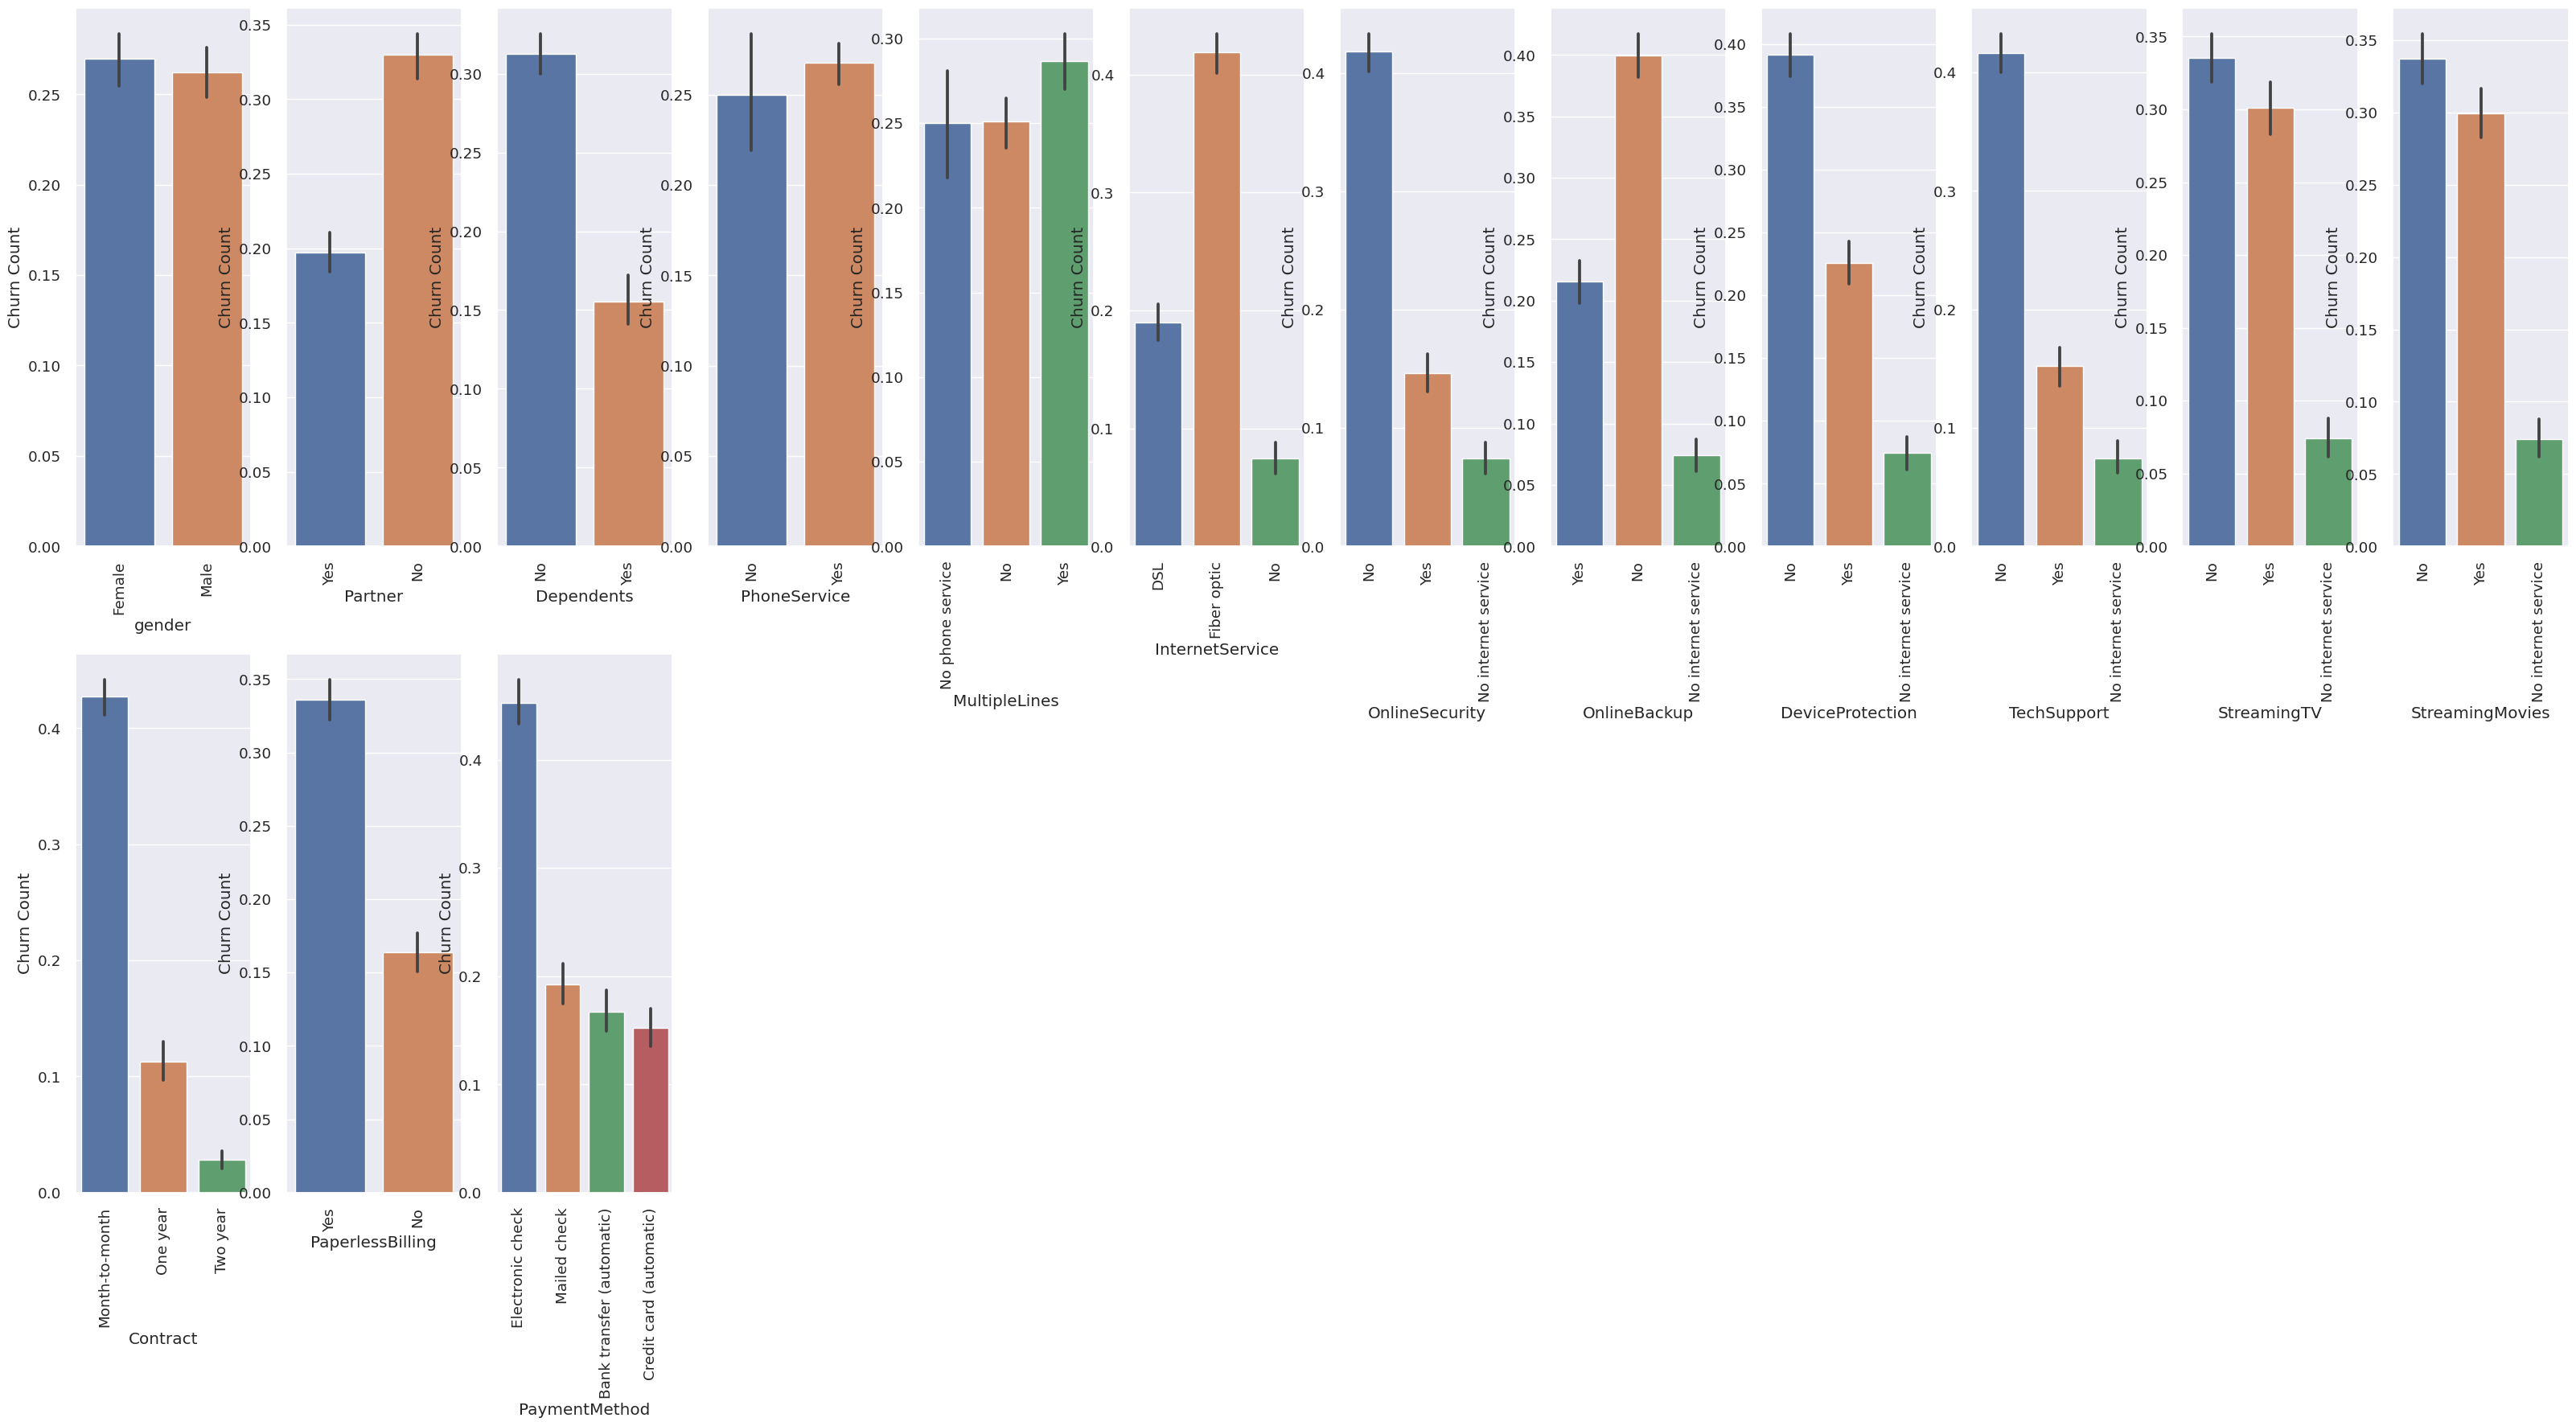

In [17]:
# Plotting every feature average in relation to the "churn"
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 40))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(4, 12, i)
    g = sns.barplot(x=column, y='Churn', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn Count')
    plt.xlabel(f'{column}')

In [37]:
df.corr() #checking correlation with numeric variables aswell

<ipython-input-37-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.015683,0.219829,0.102346,0.150541
tenure,0.015683,1.000000,0.246876,0.825714,-0.354049
MonthlyCharges,0.219829,0.246876,1.000000,0.651366,0.192922
TotalCharges,0.102346,0.825714,0.651366,1.000000,-0.199381
Churn,0.150541,-0.354049,0.192922,-0.199381,1.000000


**Answer for Q1**: We made some barplots so that we can find out the attributes with highest correlation with churn, by inspection we can see that the majority of the attributes are highly correlated, however some attributes like gender have little correlation due to both males and females having the same churn. Moreover the highest correlation with the churn is the contract where month to month has very high correlation with churn compared to one year and two year, as well as payment method and paperless billing and tech support. We will not drop any attributes as the attributes have  medium to high correlations with the churn and will affect the model positively.

**Q2: Which payment method has the highest churn rate?**

**Visualization**

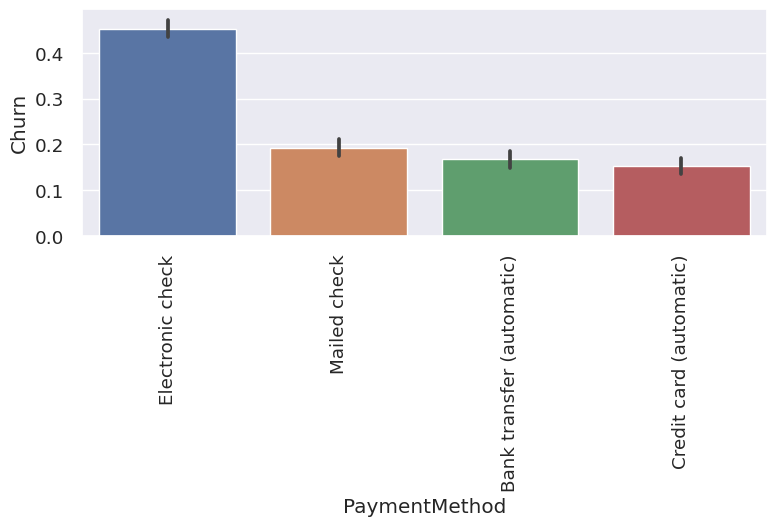

In [18]:
sns.barplot(x='PaymentMethod', y='Churn', data=df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Answer for Q2**: based on the bar chart, the payment method that has the highest churn is the electronic check

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

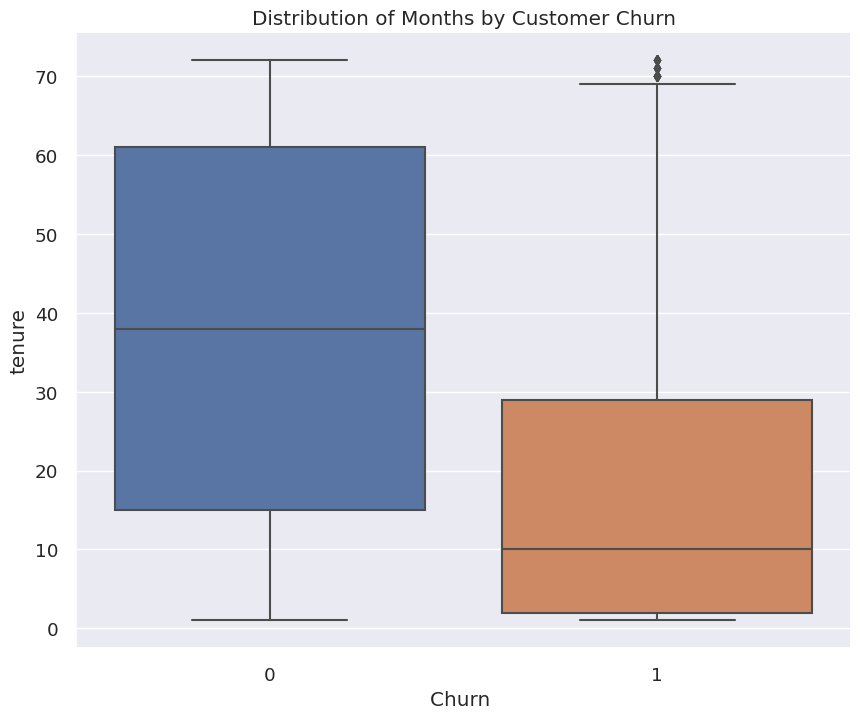

In [19]:
plt.figure(figsize=(10, 8))

sns.boxplot(x='Churn', y='tenure', data=df)

# Set the labels and title
plt.xlabel('Churn ')
plt.ylabel('tenure')
plt.title('Distribution of Months by Customer Churn')

plt.show()

**Answer for Q3**: Based on this boxplot, the 25% of churn is around 3-4 month mark, and 50% is at the 10 month mark and 75% is at the 29 month mark

## Data Preparation for Modelling

In [20]:
df_encoded = df.copy() #make a copy of df to preform modelling

In [21]:
#we will encode contract with label encoding
df_encoded['Contract'] = pd.Categorical(df['Contract'],
                                      categories=['Month-to-month', 'One year', 'Two year'],
                                      ordered=True)

df_encoded['Contract'] = df_encoded['Contract'].cat.codes
df_encoded['Contract']
categorical_features.remove('Contract')

In [22]:
#we will enocode all categorical and binary columns with onehot encoding(except for contract because we used label encoding above)
#in the case of binary columns we will remove the other column like removing female  from gender male and female etc.
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   Contract                                 7032 non-null   int8   
 3   MonthlyCharges                           7032 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   Churn                                    7032 non-null   int8   
 6   gender_Female                            7032 non-null   uint8  
 7   gender_Male                              7032 non-null   uint8  
 8   Partner_No                               7032 non-null   uint8  
 9   Partner_Yes                              7032 non-null   uint8  
 10  Dependents_No                            7032 no

In [23]:
df_encoded.drop(['Partner_No', 'gender_Female','Dependents_No','PhoneService_No','PaperlessBilling_No'], axis='columns', inplace=True) #removing these columns, because they are binary and we have their counterpart
df_encoded.columns

Index(['SeniorCitizen', 'tenure', 'Contract', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       '

## Modelling

In [24]:
from sklearn.model_selection import train_test_split #training the data

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.tree import DecisionTreeClassifier #importing the classification tree and creating it

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [26]:
import graphviz #this is the  visualization of the decision tree
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph


## Evaluation

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #these are metrics for the classification algorithm, including accuracy, f1 score, precision and recall

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [28]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.05%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.988764     0.995287  0.990451     0.992025      0.990497
recall        0.998340     0.968654  0.990451     0.983497      0.990451
f1-score      0.993529     0.981790  0.990451     0.987659      0.990409
support    3614.000000  1308.000000  0.990451  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3608    6]
 [  41 1267]]

Test Result:
Accuracy Score: 72.56%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.821618    0.485050  0.725592     0.653334      0.732132
recall        0.799871    0.520499  0.725592     0.660185      0.725592
f1-score      0.810599    0.502150  0.725592     0.656374      0.728589
support    1549.000000  561.000000  

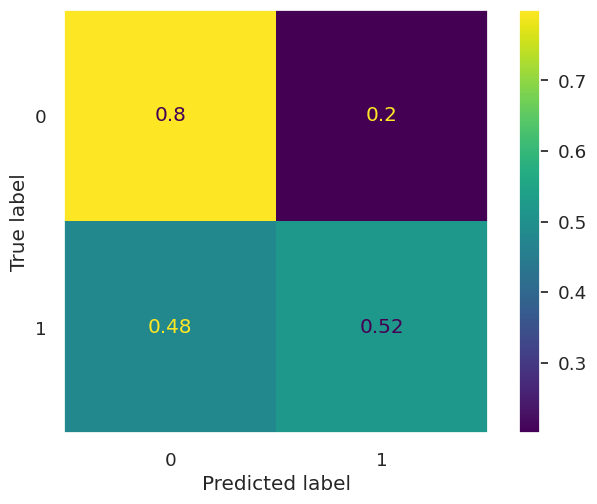

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)
#Commenting on this, 81% of cases were predicted no churn when they actually wouldnt churn while 19% were false negatives
# 51% where predicted churn while they actually were and 49% where false positives.

In [30]:
from sklearn.metrics import f1_score, precision_score, recall_score #these are the scores of precision recall and f1 for the decision tree

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.4850498338870432
Recall:  0.5204991087344029
F1_score:  0.5021496130696474


First and foremost, we will derive one of the rules of the decision tree, which is: if the contract is not month to month(one year-two year), and the monthly charges are more than 92.5 and the total charges are more than 6573 but less than 6585.5, then the customer will churn. Secondly we will comment on the node splits. The information gain is measured as the reduction in entropy or uncertainty achieved by splitting a node based on a feature and its goal is to minimize the expected number of tests needed to classify a tuple to guarantee that a simple tree is found. The gini index is the  measure of impurity or the probability of misclassifying a randomly chosen element in a set. It quantifies the degree of homogeneity within a node. A lower Gini Index indicates a better split. The node splits should be split on high information gain and low gini, but in our case, the gini fluctuates which means that there could be some randomness in splitting (not on highest information gain) or noisy data.
Now looking on how the model preformed,firstly the accuracy of the model  72.5% and it means that 72% of predictions in general were correct. out of the positive predictions (churn) the prediction which were really positive were 48.5% (Precision)
Moreover out of all real positive cases,  52% where actually predicted positive (Recall) and the F1 score 50% it is the balance between recall and percision.

## Bonus (Optional)

In [31]:
from sklearn.linear_model import LogisticRegression #importing the logisticregression model, with maximum iteration of 2000
lr_model = LogisticRegression( max_iter = 2000 )

In [32]:
# Logistic Regression time execution

%timeit lr_model.fit(X_train, y_train)

525 ms ± 153 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
lr_model.score(X_test, y_test) #accuracy of the logistic regression

0.7966824644549763

In [34]:
pred = lr_model.predict(X_test) #logistic regression precision recall and f1 score

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.6404255319148936
Recall:  0.5365418894830659
F1_score:  0.5838991270611057


In [35]:
# Logistic Regression scoring execution time

%timeit lr_model.score(X_test, y_test)

15.8 ms ± 5.29 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%timeit tree_clf.score(X_test, y_test) #classification tree execution time

The slowest run took 4.50 times longer than the fastest. This could mean that an intermediate result is being cached.
12.4 ms ± 5.16 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Based on the accuracy of both models, the logistic regression performed better than decision tree classifier because the accuracy of logistic regression was approximately 79.9% while  the decision tree was  72.61%. moreover the classification tree was slightly faster by 1 millisecond so based on time the decision tree was faster (better in the scope of time). In addition, it had a higher percision score, 64% compared with 38 % and a relatively higher recall score of 53.6% compared to 52% and lastly a higher f1 score of 58% compared with 50.2% overall making the logistic regression model better than the decision tree model.